In [1]:
import numpy as np
import os
from tensorflow.keras import models, layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import img_to_array
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import backend as K

In [20]:
IMAGE_SIZE = 256

BATCH_SIZE =32
CHANNELS=3
EPOCHS = 60

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
  "PlantVillage",
  shuffle =True,
  image_size=(IMAGE_SIZE,IMAGE_SIZE),
  batch_size=BATCH_SIZE
)




Found 2252 files belonging to 3 classes.


In [4]:
class_names = dataset.class_names
n_classes = len(class_names)
print(n_classes, class_names)

3 ['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']


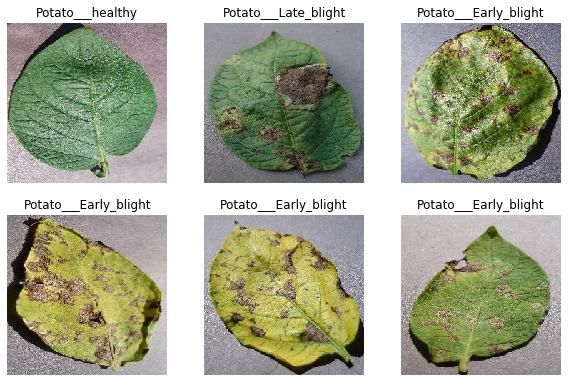

In [5]:
plt.figure(figsize=(10,10))
for images_batch,label_batch in dataset.take(1):
    for i in range(6):
        
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
    
        plt.axis("off")

In [6]:
len(dataset)

71

In [ ]:
##spliting the dataset int tarnning valid and test
## sare data set me se 80% is for taring and 10% for test and for validation 10%
80% ==> training
20%==>10% validation,10% test

In [6]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [7]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [8]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
##we new to do some preprosecing we hvae to get pixl val like 256/255 so thae i can get number betwen 0 and 1


In [10]:
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [11]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

In [21]:
## now building the layer
input_shape = (BATCH_SIZE,IMAGE_SIZE, IMAGE_SIZE, CHANNELS)## input shape is 3x256x256
n_classes =3
model = models.Sequential([
    ##1st layer
    resize_and_rescale,
    data_augmentation, 
    ## 3rd layer is layer of cnn
    ## kerner size means is filter size i.e in ths case 3x3
    layers.Conv2D(64, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    ##after cnn we will do max pooling layer
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    ## what ever data we from different layer  we need to flatern to use it
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [17]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 sequential_2 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (32, 254, 254, 64)        1792      
                                                                 
 max_pooling2d_6 (MaxPooling  (32, 127, 127, 64)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (32, 125, 125, 64)        36928     
                                                                 
 max_pooling2d_7 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                  

In [23]:
## now we are compilig
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

## history stroe krega diffrent parameter of epoch 
history = model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds,
     
)
    

In [ ]:
history = model.fit( train_ds, epochs=EPOCHS, batch_size=BATCH_SIZE, verbose=1, validation_data=val_ds,

)

Epoch 1/60
56/56 [==============================] - 157s 3s/step - loss: 0.9651 - accuracy: 0.4859 - val_loss: 0.8435 - val_accuracy: 0.4951
Epoch 2/60
56/56 [==============================] - 156s 3s/step - loss: 0.7519 - accuracy: 0.6287 - val_loss: 0.5190 - val_accuracy: 0.7549
Epoch 3/60
56/56 [==============================] - 155s 3s/step - loss: 0.4925 - accuracy: 0.7765 - val_loss: 0.3013 - val_accuracy: 0.9069
Epoch 4/60
56/56 [==============================] - 155s 3s/step - loss: 0.3809 - accuracy: 0.8313 - val_loss: 0.3378 - val_accuracy: 0.8284
Epoch 5/60
56/56 [==============================] - 155s 3s/step - loss: 0.3000 - accuracy: 0.8809 - val_loss: 0.2422 - val_accuracy: 0.9020
Epoch 6/60
56/56 [==============================] - 156s 3s/step - loss: 0.2532 - accuracy: 0.9074 - val_loss: 0.2263 - val_accuracy: 0.9069
Epoch 7/60
56/56 [==============================] - 156s 3s/step - loss: 0.2758 - accuracy: 0.8883 - val_loss: 0.2065 - val_accuracy: 0.9363
Epoch 8/60
56

In [ ]:
## now we will find the different parameter and plot and calculate the accuracy
## so epoch is a basically we are using hit and traial we chose between 20-50 so that we can get much accuracy as we can

## as we can see jitna jada epoch layer ho raha hai the valadiation accuray is increasing


In [ ]:
## now rough check score to get and idea of accuracy
scores = model.evaluate(test_ds)

In [ ]:
scores

In [ ]:

 ## for ploting we will use history as it sotre all 25 accuray value
    

In [74]:
history.params

{'verbose': 1, 'epochs': 25, 'steps': 56}

In [75]:
history.history.keys()
## this is a polt of tranning vs validation accu..and also loss

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [29]:
## we can see that as now of epoch increase accuracy is increase
## lossy is basically is an error as it decreasing as increse in epoch
## % accuracy
print("[INFO] Calculating model accuracy")
scores = model.evaluate(test_ds)
print(f"Test Accuracy: {round(scores[1],4)*100}%")

[INFO] Calculating model accuracy
8/8 [==============================] - 3s 379ms/step - loss: 0.0493 - accuracy: 0.9873
Test Accuracy: 98.72999999999999%


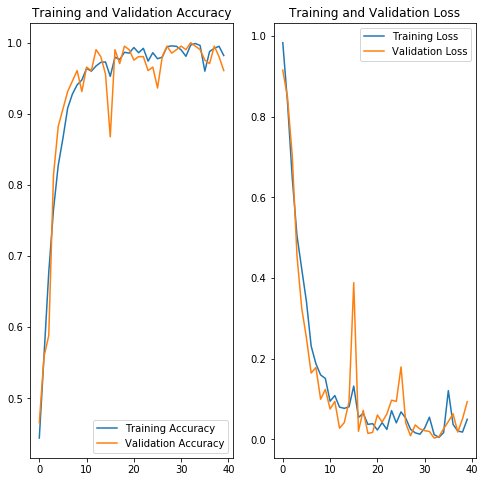

In [19]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

The image to be predicted
actual disease is: Potato___Early_blight
predicted leaf disease Potato___Early_blight


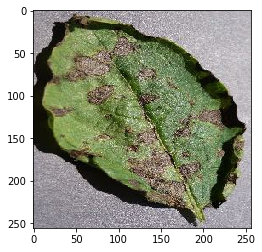

In [27]:
##now we will do prediction 
## pehlae we will predict on is batch of image
import numpy as np 
for images_batch, labels_batch in test_ds.take(1):
    myfirst_image = images_batch[0].numpy().astype('uint8')
    first_label = label_batch[0].numpy()
    print("The image to be predicted")
    plt.imshow(myfirst_image)
    print("actual disease is:",class_names[first_label])
    ## ab we need to predict the image we call the function model.predict 
    ## yeh hmae 3 probabilties dega so what ever is heighst prob. the image is belongig to that class
    ## numpy.argmax given the index for hieghst number in array
    batch_prediction = model.predict(images_batch)
    print("predicted leaf disease",class_names[np.argmax(batch_prediction [0])])
    

In [21]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0) # Create a batch

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

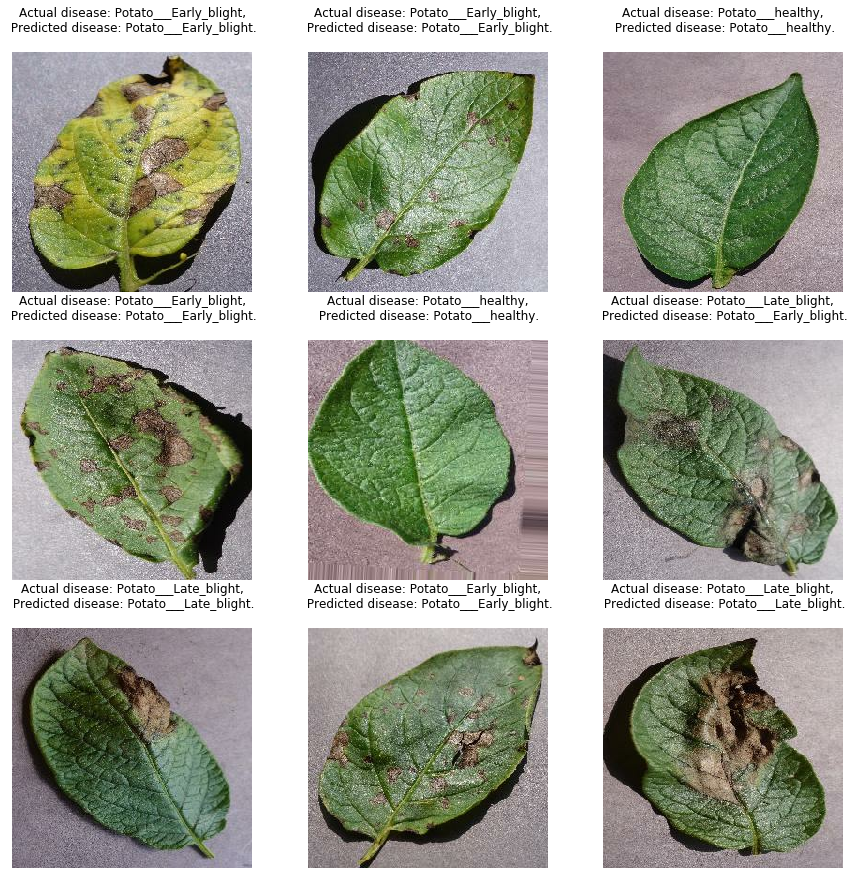

In [28]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predicted_class, confidence = predict(model, images[i].numpy())
        
        actual_class = class_names[labels[i]] 
        plt.title(f"Actual disease: {actual_class},\n Predicted disease: {predicted_class}.\n ")
        plt.axis("off")

In [114]:
model_version=1
model.save(f"../models/{model_version}")

KeyError: "Failed to add concrete function 'b'__inference_sequential_9_layer_call_fn_33142'' to object-based SavedModel as it captures tensor <tf.Tensor: shape=(), dtype=resource, value=<Resource Tensor>> which is unsupported or not reachable from root. One reason could be that a stateful object or a variable that the function depends on is not assigned to an attribute of the serialized trackable object (see SaveTest.test_captures_unreachable_variable)."

In [149]:

model_version=1
model.save("1.h5")

KeyError: "Failed to add concrete function 'b'__inference_sequential_9_layer_call_fn_41866'' to object-based SavedModel as it captures tensor <tf.Tensor: shape=(), dtype=resource, value=<Resource Tensor>> which is unsupported or not reachable from root. One reason could be that a stateful object or a variable that the function depends on is not assigned to an attribute of the serialized trackable object (see SaveTest.test_captures_unreachable_variable)."